E1. Analiza dynamiki wybranej giełdy za pomocą  wybranej techniki teorii grafów 

**Research question: What are correlations between constituents on London stock market?**

Celem tego ćwiczenia jest zbadanie dynamiki wybranej giełdy w okresie narastania wybranej bańki giełdowej oraz  jej pęknięcia, z wykorzystaniem teorii grafów. Realizacja ćwiczenia składa się  z następujących etapów:  

1.  wybór  giełdy  i  ściągnięcie  odpowiednich  empirycznych  danych  giełdowych  z  wybranej  strony internetowej lub uzyskanie ich bezpośrednio z danej giełdy,  
    1. Download FTSE100 historical data from yahoo, transform it into a dataframe and save to a file. 
    2. Plot number of constituents(time) for FTSE100
        1. To do it I should first check the data. Are there any missing values for certain constituents? I can achieve it through finding a start date for each ticker. It can be in a form of a list.
    3. Check is the data complete?
    4. On y axis check does it contains all days except weekends?
    5. For each constituent count how many rows are missing?
2.  Calculate correlations matrix for FTSE100
    1. Create new Stock_values_dataframe with variables that indicate prices.
3.  dobór odpowiedniego modelu sieci oraz algorytmu generującego,  
4.  dobór właściwych przedziałów średniowania,  
5.  dyskusja  uzyskanych  wyników  a  w tym  zwłaszcza  ewentualnych  strukturalnych  topologicznych) przemian fazowych prowadzących do analizy kryzysu i krachu. 

### Questions
    Should I use log transformation?
    How should I calculate <Si> How many days average. (See exercise notes 1.2)
    How to calculate distances between companies? How to interpret them?

[Exercise materials](https://drive.google.com/open?id=0ByG3ASYoU228cnFHaEZDR0tQcWlaZlNGa2xoUEhNSUJfMDg4)

### Notes(Exercise materials)
    1.1 Diferences a couple orders of magnitude
    1.2 <Si> - average over for example 50 days.



In [1]:
import urllib,time,datetime
import pandas.io.data as web
import pandas as pd
import numpy as np
import pylab as py
import datetime as dt

%matplotlib inline

/Users/pawel/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


1. 
    A. Below I download FTSE100 historical data from yahoo and save it to data_FTSE100.txt

In [2]:
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2015, 4, 29)

In [ ]:
with open('./constituents_FTSE100') as f:
    lines = f.readlines()

In [ ]:
#fig = py.figure()
f=web.DataReader(lines[0].strip(), 'yahoo', start, end)

lines = lines[0:100]
y=[]

for line in lines:
    if len(line.strip())>1:
        try:
            f=web.DataReader(line.strip(), 'yahoo', start, end)
        except:
            raise
        else:
            y.append( f['Open'] )            
            #print( f )
#print ( y[0]['Open'] )
#print ( y[1] )
#print ( "And so on ..." )

# = y[0]['Open'] 

Stock_values_dataframe = pd.concat( y, axis=1 )

Stock_values_dataframe.columns = [ line.replace( "\n", "" ) for line in lines ]

#print( Stock_values_dataframe )


Stock_values_dataframe.to_csv( "./data_FTSE100.txt" )

#file = open( "./data_FTSE100.txt", "w" )
#for i in y:
#    file.write( str( i ) ) 
#file.close()

## Note
    In 1. A. I downloaded data for FTSE100 and saved it to a file. Below read data from the file. 

In [3]:
Stock_values_dataframe = pd.read_csv( "./data_FTSE100.txt" )

print( Stock_values_dataframe )
print( len( lines ) )
#print( lines[] )

            Date   AAL.L    ABF.L   ADM.L  ADN.L   AGK.L     AHT.L   ANTO.L  \
0     1988-05-03     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
1     1988-05-04     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
2     1988-05-05     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
3     1988-05-06     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
4     1988-05-09     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
5     1988-05-10     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
6     1988-05-11     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
7     1988-05-12     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
8     1988-05-13     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
9     1988-05-16     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
10    1988-05-17     NaN      NaN     NaN    NaN     NaN       NaN      NaN   
11    1988-05-18     NaN      NaN     NaN    NaN    

NameError: name 'lines' is not defined

### 1. B. Below I calculate number of constituents( time )

In [5]:
#py.xlabel('Date')
#py.ylabel('liczba spolek')
#py.title('FTSE100')

constituents_tickers = Stock_values_dataframe.columns[ 1: ]

start_dates_constituents_list = []

print( Stock_values_dataframe.loc[ 2, "ABF.L" ] ) 

for constituent_ticker in constituents_tickers:
    for date_index in range( len( Stock_values_dataframe ) ):
        if Stock_values_dataframe.loc[ date_index, constituent_ticker ] == Stock_values_dataframe.loc[ 
            date_index, constituent_ticker ]:
            start_dates_constituents_list.append( Stock_values_dataframe[ 'Date' ][ date_index ] )
            break
                                  
                        
#print( Stock_values_dataframe['Date'] )
print( start_dates_constituents_list )
#    for k in y:
#        if k<=i:
#            j+=1
#    x.append(j)

#py.plot(y,x, 'ro')
#py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
#py.clf()

nan
['1999-05-24', '1988-07-01', '2004-09-23', '1991-03-28', '1997-09-29', '1988-07-01', '1988-07-01', '1998-04-17', '1988-07-01', '1993-05-21', '1988-07-01', '1989-08-11', '1988-07-01', '1995-01-03', '1988-07-01', '1988-07-01', '1988-07-01', '1997-07-22', '1988-07-01', '1988-07-01', '2002-07-12', '1988-07-01', '2013-04-29', '2000-10-23', '1997-02-17', '2000-01-04', '1989-04-24', '2000-01-04', '2009-10-01', '1988-05-03', '2012-10-11', '2006-10-09', '2000-11-15', '2008-05-09', '2003-07-15', '1988-07-01', '2011-05-19', '1988-07-01', '2005-11-01', '2007-05-15', '1988-07-01', '1988-07-05', '2003-01-02', '2003-03-31', '1993-03-31', '1996-10-01', '1989-01-31', '2002-05-24', '2000-01-04', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '1995-12-28', '2001-07-20', '1988-07-01', '1988-07-01', '2007-06-29', '1988-07-01', '1995-12-11', '1988-07-01', '1999-07-12', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '2005-07-15', '2000-05-15', '1988-07-01', '1988-07-01', '

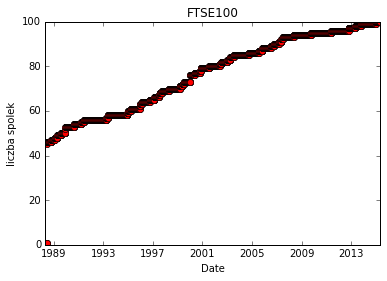

In [6]:
number_of_constituents_list = []
    
for date_index in range( len( Stock_values_dataframe ) ):
    number_of_constituents = 0
    for start_date in start_dates_constituents_list:
        if Stock_values_dataframe[ 'Date' ][ date_index ] > start_date:
            number_of_constituents += 1
    number_of_constituents_list.append( number_of_constituents )
    
    
#.date()
all_dates = [ dt.datetime.strptime( date, '%Y-%m-%d' ) for date in Stock_values_dataframe[ 'Date' ].tolist() ]
#y = range( len( x ) )

py.xlabel('Date')
py.ylabel('liczba spolek')
py.title('FTSE100')

#print( number_of_constituents_list )
py.plot( all_dates, number_of_constituents_list, 'ro' )
py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
#py.clf()

1.C. Check completeness of the data. 

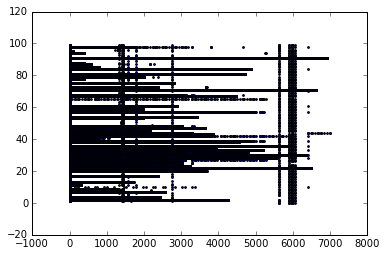

In [7]:
fig = py.figure()

already_started = False

x = []
y = []

for constituent_number in range( len( constituents_tickers) ):
    for date_index in range( len( Stock_values_dataframe ) ):
        if ( not already_started ) and ( Stock_values_dataframe.loc[ date_index, 
                                                                    constituents_tickers[ constituent_number ] ] == 
                Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] ):
            already_started = True
            
        if already_started: 
            if not ( Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] == 
                Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] ):
                #print( "missing value" )
                x.append( date_index )
                y.append( constituent_number )
                
py.scatter( x, y, s = 3 )

#fig.savefig('~/Dokumenty/education/studia_courses/laboratory_II_degree_physics/missing_data.jpg')
#py.clf()
py.show()
            

In [8]:
#py.scatter( x, y, s = 3 )
#py.show()

1.D. On y axis check does it contains all days except weekends?

In [9]:
dates = []

for date_index in range( len( Stock_values_dataframe ) ):
    dates.append( Stock_values_dataframe.loc[ date_index, "Date" ] )

dates_datetime = pd.to_datetime( dates )
dates_dataframe = pd.DataFrame( dates_datetime )
#print( dates_dataframe.dtypes )

for date_index in range( len( Stock_values_dataframe ) ):
    Stock_values_dataframe.loc[ date_index, "Date" ] = dates_dataframe.loc[ date_index, 0 ]
    print( dates_dataframe.loc[ date_index, 0 ] )
    print( Stock_values_dataframe.loc[ date_index, "Date" ] )

#df = pd.to_datetime( ["1988-07-01", "1988-07-02"] )
#df = pd.DataFrame( df )
#print( df.dtypes )

print( Stock_values_dataframe.dtypes )

1988-05-03 00:00:00
1988-05-03 00:00:00
1988-05-04 00:00:00
1988-05-04 00:00:00
1988-05-05 00:00:00
1988-05-05 00:00:00
1988-05-06 00:00:00
1988-05-06 00:00:00
1988-05-09 00:00:00
1988-05-09 00:00:00
1988-05-10 00:00:00
1988-05-10 00:00:00
1988-05-11 00:00:00
1988-05-11 00:00:00
1988-05-12 00:00:00
1988-05-12 00:00:00
1988-05-13 00:00:00
1988-05-13 00:00:00
1988-05-16 00:00:00
1988-05-16 00:00:00
1988-05-17 00:00:00
1988-05-17 00:00:00
1988-05-18 00:00:00
1988-05-18 00:00:00
1988-05-19 00:00:00
1988-05-19 00:00:00
1988-05-20 00:00:00
1988-05-20 00:00:00
1988-05-23 00:00:00
1988-05-23 00:00:00
1988-05-24 00:00:00
1988-05-24 00:00:00
1988-05-25 00:00:00
1988-05-25 00:00:00
1988-05-26 00:00:00
1988-05-26 00:00:00
1988-05-27 00:00:00
1988-05-27 00:00:00
1988-05-30 00:00:00
1988-05-30 00:00:00
1988-05-31 00:00:00
1988-05-31 00:00:00
1988-06-27 00:00:00
1988-06-27 00:00:00
1988-06-28 00:00:00
1988-06-28 00:00:00
1988-06-29 00:00:00
1988-06-29 00:00:00
1988-06-30 00:00:00
1988-06-30 00:00:00


In [ ]:
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2015, 4, 29)

#dates_dataframe = pd.DataFrame( pd.date_range(start, end, freq='B') )
dates_datetime = pd.to_datetime( pd.date_range( start, end, freq='B' ) )
dates_dataframe = pd.DataFrame( dates_datetime )

dates_dataframe.columns = [ "Date" ]
#print( dates_dataframe )

print( dates_dataframe.dtypes )

for date_index in range( len( dates_dataframe ) ):
    dates_stock = Stock_values_dataframe[ "Date" ].tolist()
    print( dates_stock )
    print(   )
    if not ( dates_dataframe.loc[ date_index, "Date" ] in dates_stock ):
        print( "not" )
    
    # 
    

#Stock_values_dataframe = pd.merge( Stock_values_dataframe, dates_dataframe, how = "right", on = 'Date')
#Stock_values_dataframe = Stock_values_dataframe.merge( dates_dataframe, how = 'outer', on = 'Date' )
#Stock_values_dataframe = dates_dataframe.merge( Stock_values_dataframe, how = 'outer', on = 'Date' )

#Stock_values_dataframe = pd.concat( [ Index_dataframe, Stock_values_dataframe ], axis=1 )

#print( Stock_values_dataframe.dtypes )
#print( Stock_values_dataframe )

Date    datetime64[ns]
dtype: object
[Timestamp('1988-05-03 00:00:00'), Timestamp('1988-05-04 00:00:00'), Timestamp('1988-05-05 00:00:00'), Timestamp('1988-05-06 00:00:00'), Timestamp('1988-05-09 00:00:00'), Timestamp('1988-05-10 00:00:00'), Timestamp('1988-05-11 00:00:00'), Timestamp('1988-05-12 00:00:00'), Timestamp('1988-05-13 00:00:00'), Timestamp('1988-05-16 00:00:00'), Timestamp('1988-05-17 00:00:00'), Timestamp('1988-05-18 00:00:00'), Timestamp('1988-05-19 00:00:00'), Timestamp('1988-05-20 00:00:00'), Timestamp('1988-05-23 00:00:00'), Timestamp('1988-05-24 00:00:00'), Timestamp('1988-05-25 00:00:00'), Timestamp('1988-05-26 00:00:00'), Timestamp('1988-05-27 00:00:00'), Timestamp('1988-05-30 00:00:00'), Timestamp('1988-05-31 00:00:00'), Timestamp('1988-06-27 00:00:00'), Timestamp('1988-06-28 00:00:00'), Timestamp('1988-06-29 00:00:00'), Timestamp('1988-06-30 00:00:00'), Timestamp('1988-07-01 00:00:00'), Timestamp('1988-07-04 00:00:00'), Timestamp('1988-07-05 00:00:00'), Timestamp(

In [ ]:
def num_missing( x ):
    return sum( x.isnull() )

print( Stock_values_dataframe.apply(num_missing, axis=0) )

### Idea
    To merge above I can use:
    result = df1.append(df4)

[How to merge idea here](http://pandas.pydata.org/pandas-docs/stable/merging.html)

    New idea: I can go through every row and compare dates in Stock_values_dataframe and dates_dataframe. If there is na missing data than I can add new row.

### Note
    Dates in Date column in Stock_values_dataframe and dates_dataframe are different.